<a href="https://colab.research.google.com/github/GabrielRamirezs/Metodos1_KarenQuevedo_GabrielRamirez/blob/main/Parcial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

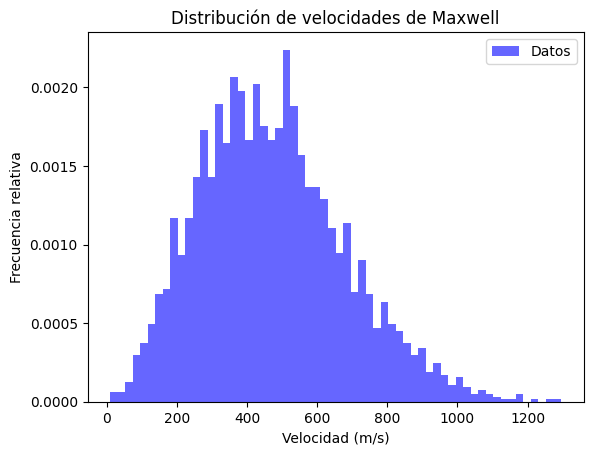

Velocidad promedio empírica: 472.15 m/s
Temperatura ajustada: 295.91 K
Velocidad más probable: 419.11 m/s
Velocidad promedio (teórica): 472.91 m/s


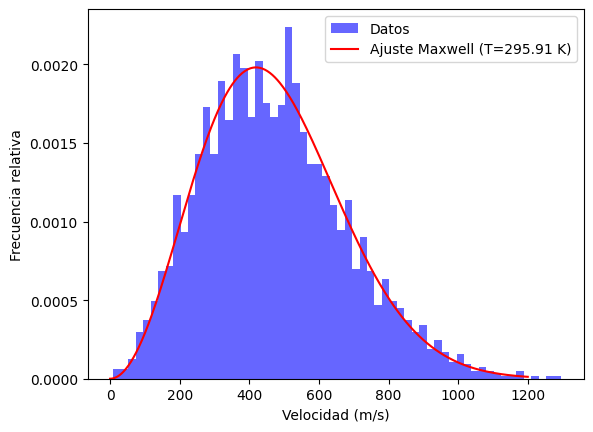

Velocidad cuadrática media: 513.30 m/s


In [3]:
#9
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Maxwell.csv"
data = pd.read_csv(url, header=None)
velocities = pd.to_numeric(data[0], errors='coerce').dropna().values

bins = 60
freq, edges = np.histogram(velocities, bins=bins, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2

plt.hist(velocities, bins=bins, density=True, alpha=0.6, color='blue', label='Datos')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.title('Distribución de velocidades de Maxwell')
plt.legend()
plt.show()

velocity_mean_empirical = np.sum(bin_centers * freq * np.diff(edges))
print(f"Velocidad promedio empírica: {velocity_mean_empirical:.2f} m/s")

def maxwell_distribution(v, T):
    m = 0.028 / 6.022e23
    k_B = 1.38e-23
    return 4 * np.pi * (m / (2 * np.pi * k_B * T))**1.5 * v**2 * np.exp(-m * v**2 / (2 * k_B * T))

T_initial = 300
popt, _ = curve_fit(lambda v, T: maxwell_distribution(v, T), bin_centers, freq, p0=[T_initial])
T_best_fit = popt[0]
print(f"Temperatura ajustada: {T_best_fit:.2f} K")

v_probable = np.sqrt(2 * 1.38e-23 * T_best_fit / (0.028 / 6.022e23))
print(f"Velocidad más probable: {v_probable:.2f} m/s")

v_avg = np.sqrt(8 * 1.38e-23 * T_best_fit / (np.pi * (0.028 / 6.022e23)))
print(f"Velocidad promedio (teórica): {v_avg:.2f} m/s")

v_model = np.linspace(0, 1200, 500)
pdf_model = maxwell_distribution(v_model, T_best_fit)

plt.hist(velocities, bins=bins, density=True, alpha=0.6, color='blue', label='Datos')
plt.plot(v_model, pdf_model, 'r-', label=f'Ajuste Maxwell (T={T_best_fit:.2f} K)')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Frecuencia relativa')
plt.legend()
plt.show()

v_rms = np.sqrt(3 * 1.38e-23 * T_best_fit / (0.028 / 6.022e23))
print(f"Velocidad cuadrática media: {v_rms:.2f} m/s")

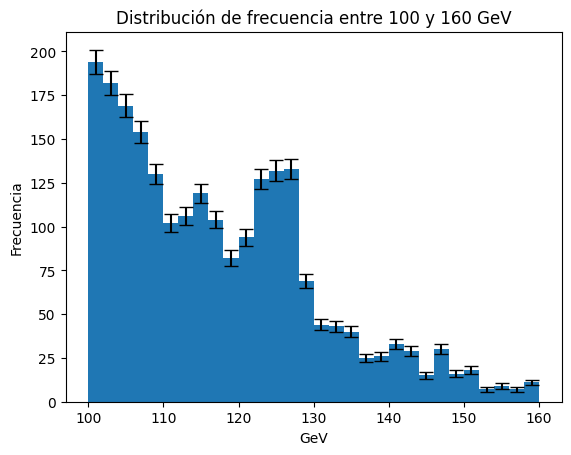

<ipython-input-4-c0e2dd318acd>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  log_likelihood += -1 * math.log(hipotesis_nula(α, xi))


In [4]:
#10
import math
from scipy.optimize import minimize

url ="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/HiggsFitting.csv"
data= pd.read_csv(url, header=None)

data[0] = pd.to_numeric(data[0], errors='coerce')
filtered_data = data[(data[0] >= 100) & (data[0] <= 160)][0].values

n, bins, patches = plt.hist(filtered_data, bins=30, range=(100, 160))

bin_centers = 0.5 * (bins[:-1] + bins[1:])
error = 0.5*np.sqrt(n)
plt.errorbar(bin_centers, n, yerr=error, fmt='none', ecolor='k', capsize=5)

plt.xlabel('GeV')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia entre 100 y 160 GeV')
plt.show()

def hipotesis_nula(x,α):
  return (1/α)*np.exp((-x+100)/α)

def negative_log_likelihood(α, x, hipotesis_nula):
    n = len(x)
    log_likelihood = 0
    for xi in x:
        log_likelihood += -1 * math.log(hipotesis_nula(α, xi))
    return log_likelihood
bounds = ((0, 50),)
x0=1
resultado = minimize(lambda alpha: negative_log_likelihood(alpha, filtered_data, hipotesis_nula), x0, bounds=bounds)